# Main

In [10]:
from ortools.constraint_solver import pywrapcp
from ortools.sat.python import cp_model
import os

In [18]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [38]:
idx = 34
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

70 1678
0 1
0 3


In [39]:


lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [40]:
n_points = node_count
n_colors = 15

solver = pywrapcp.Solver('Colors')
colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
print(n_points)

70


In [41]:
for i,j in edges:
    solver.Add(colors[i]!=colors[j])

In [42]:
mode = 1
if mode ==1:
    
    solver.Minimize(solver.Sum(colors),1)
else:
    solver.Minimize(solver.Max(colors),1)
# solver.TimeLimit(5000)
db = solver.Phase(colors,
                    solver.CHOOSE_FIRST_UNBOUND,
                    solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)


In [46]:
num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in colors]

print(max(*res)+1)
print(*res)

26
0 1 0 2 2 3 3 4 5 4 5 1 6 7 7 7 5 6 2 8 9 10 7 11 9 12 11 8 9 0 12 2 10 4 10 13 1 13 11 14 3 15 12 3 15 16 8 1 14 14 16 0 17 15 18 6 9 19 5 13 17 18 20 21 19 19 20 21 10 25


In [25]:
    
solver.EndSearch()

In [67]:
res

[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 3, 0, 0]

In [31]:
def algo(edges,n_points):
    # solver = pywrapcp.Solver('Colors')
    solver = pywrapcp.Solver('Colors')
    colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
    for i,j in edges:
        solver.Add(colors[i]!=colors[j])
    solver.Minimize(solver.Max(colors),1)
    db = solver.Phase(colors,
                        solver.CHOOSE_FIRST_UNBOUND,
                        solver.ASSIGN_MIN_VALUE)
    solver.NewSearch(db)

    if solver.NextSolution():
        return [c.Value() for c in colors]
    else:
        return []

In [ ]:

def algo2(edges,n_points):
    solver = pywrapcp.Solver('Colors')
    colors = [solver.IntVar(0,n_points-1,f'c_{i}') for i in range(n_points)]
    
    for i,j in edges:
        solver.Add(colors[i]!=colors[j])
    solver.Minimize(solver.Max(colors),1)
    db = solver.Phase(colors,
                        solver.CHOOSE_FIRST_UNBOUND,
                        solver.ASSIGN_MIN_VALUE)
    solver.NewSearch(db)

    if solver.NextSolution():
        return [c.Value() for c in colors]
    else:
        return []

In [35]:
import numpy as np

In [39]:
xx = np.array(edges).flatten()

In [46]:
solver.Count(colors,1,5)

SumBoolean(Watch<c_0 == 1>(0 .. 1), Watch<c_1 == 1>(0 .. 1), Watch<c_2 == 1>(0 .. 1), Watch<c_3 == 1>(0 .. 1), Watch<c_4 == 1>(0 .. 1), Watch<c_5 == 1>(0 .. 1), Watch<c_6 == 1>(0 .. 1), Watch<c_7 == 1>(0 .. 1), Watch<c_8 == 1>(0 .. 1), Watch<c_9 == 1>(0 .. 1), Watch<c_10 == 1>(0 .. 1), Watch<c_11 == 1>(0 .. 1), Watch<c_12 == 1>(0 .. 1), Watch<c_13 == 1>(0 .. 1), Watch<c_14 == 1>(0 .. 1), Watch<c_15 == 1>(0 .. 1), Watch<c_16 == 1>(0 .. 1), Watch<c_17 == 1>(0 .. 1), Watch<c_18 == 1>(0 .. 1), Watch<c_19 == 1>(0 .. 1), Watch<c_20 == 1>(0 .. 1), Watch<c_21 == 1>(0 .. 1), Watch<c_22 == 1>(0 .. 1), Watch<c_23 == 1>(0 .. 1), Watch<c_24 == 1>(0 .. 1), Watch<c_25 == 1>(0 .. 1), Watch<c_26 == 1>(0 .. 1), Watch<c_27 == 1>(0 .. 1), Watch<c_28 == 1>(0 .. 1), Watch<c_29 == 1>(0 .. 1), Watch<c_30 == 1>(0 .. 1), Watch<c_31 == 1>(0 .. 1), Watch<c_32 == 1>(0 .. 1), Watch<c_33 == 1>(0 .. 1), Watch<c_34 == 1>(0 .. 1), Watch<c_35 == 1>(0 .. 1), Watch<c_36 == 1>(0 .. 1), Watch<c_37 == 1>(0 .. 1), Watch<c_38 

In [47]:
solver.BetweenCt(colors[0],5,20)

BetweenCt(c_0(0..49), 5, 20)

# Linear Solver

In [33]:
from ortools.linear_solver import pywraplp
import numpy as np
import os

In [34]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [36]:
idx = 10
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

20 23
0 16
1 2



In [37]:
lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [38]:
solver = pywraplp.Solver.CreateSolver('simple_mip_program', 'CBC')

In [39]:
ccnt = np.array(edges).flatten()
n_colors = max(*[len(ccnt[ccnt==i]) for i in range(node_count)])
n_colors = 8#node_count
cmat = [[0]*n_colors]*node_count # node_count x n_colors

In [40]:
# Create the color matrix
for i in range(node_count):
#     for j in range(n_colors):
#         print(f'c_{i}_{j}')
    cmat[i] = [solver.IntVar(0,1,f'c_{i}_{j}') for j in range(n_colors)]

In [41]:
# cmat

In [42]:

# Assign one color to every node
for i in range(node_count):
    solver.Add(solver.Sum(cmat[i])==1)
#     solver.Add(solver.Sum(cmat[i])>=1)

In [43]:
solver.Add(solver.Sum([cmat[i][0] for i in range(n_colors)])>=1)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000001F4717F1540> >

In [44]:
# Neighbor nodes can't have the same color
for n1,n2 in edges:
    for c in range(n_colors):
        solver.Add(cmat[n1][c]+cmat[n2][c]<=1)

In [45]:
col_sums = [solver.Sum([cmat[i][c] for i in range(node_count)]) for c in range(n_colors)]

for c in range(1,n_colors):
    solver.Add(col_sums[c-1]>=col_sums[c])

In [47]:
solver.Minimize(solver.Sum([col_sums[i]*i for i in range(n_colors)]))
# solver.Maximize(solver.Sum([col_sums[i]*col_sums[i] for i in range(n_colors)]))

In [48]:
status = solver.Solve()

In [49]:
status == pywraplp.Solver.OPTIMAL

True

In [50]:
solver.Sum([solver.Sum(cmat[i])*i for i in range(node_count)]).solution_value()

190.0

In [51]:
for j in range(node_count):
    print(*[cmat[j][i].solution_value() for i in range(n_colors)])

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


# Constraint Prog. 2

In [1]:
from ortools.constraint_solver import pywrapcp
from ortools.sat.python import cp_model
import os

In [2]:
def show_mat(l):
    for row in l:
        print(*row)

In [3]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [4]:
idx = 27
with open(f'./data/{files[idx]}','r') as fp:
    input_data = fp.read()
print(input_data[:15])

50 350
0 3
0 5



In [5]:


lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [6]:
n_points = node_count
n_colors = n_points-1
solver = pywrapcp.Solver('Colors')
colors = [[solver.IntVar(0,1,f'c_{i}_{j}') for j in range(n_colors)] for i in range(n_points)]
print(n_points)

50


In [7]:
for row in colors:
    solver.Add(solver.Sum(row)==1)

In [8]:
# Neighbor nodes can't have the same color
for n1,n2 in edges:
    for c in range(n_colors):
        solver.Add(colors[n1][c]*colors[n2][c]==0)    

In [9]:
col_sums = [solver.Sum([colors[i][c] for i in range(node_count)]) for c in range(n_colors)]
for c in range(1,n_colors):
    solver.Add(col_sums[c-1]>=col_sums[c])

In [10]:
# solver.Minimize(solver.Sum([col_sums[i]*i for i in range(n_colors)]),1)
solver.Maximize(solver.Sum([col_sums[i]*col_sums[i] for i in range(n_colors)]),1)

<ortools.constraint_solver.pywrapcp.OptimizeVar; proxy of <Swig Object of type 'operations_research::OptimizeVar *' at 0x0000023C57F4F9C0> >

In [11]:
flat_c = [item for sublist in colors for item in sublist]
db = solver.Phase(flat_c,solver.CHOOSE_FIRST_UNBOUND,solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)


In [ ]:
num_solutions = 0

if solver.NextSolution():
    res = []
    for row in colors:
        res.append([c.Value() for c in row])
    print(f'Solution#{num_solutions+1}')
    show_mat(res)
    num_solutions+=1

    
solver.EndSearch()
# print(max(*res)+1)


In [48]:
show_mat(res)

0 0 1
0 1 0
1 0 0
1 0 0


# Sample problems

In [11]:
solver = pywrapcp.Solver('nums') 

In [12]:
x = [solver.IntVar(1,9,f'x_{i}') for i in range(5)]

In [29]:
solver.Add(solver.AllDifferent(x))
for i in range(1,len(x)):
    solver.Add(x[i]<x[i-1])

In [30]:
solver.Add(solver.Sum(x)==20)
solver.Minimize(x[0],1)

<ortools.constraint_solver.pywrapcp.OptimizeVar; proxy of <Swig Object of type 'operations_research::OptimizeVar *' at 0x000002D74F36ADE0> >

In [13]:
db = solver.Phase(x,solver.CHOOSE_FIRST_UNBOUND,solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)
num_solutions = 0

if solver.NextSolution():
    res = [c.Value() for c in x]
    
solver.EndSearch()

In [15]:
x

[x_0(1..9), x_1(1..9), x_2(1..9), x_3(1..9), x_4(1..9)]

# magic square

In [53]:
from functools import reduce

In [451]:
model = cp_model.CpModel()
n = 5
row_sum = int(n*(n**2+1)/2)
x = [[model.NewIntVar(1,n**2,f'x_{i}_{j}') for j in range(n)] for i in range(n)]

In [452]:
xflat = []
for i in range(n):
    xflat.extend(x[i])
model.AddAllDifferent(xflat)

In [453]:
for i in range(n):
    
    model.Add(sum(x[i])==row_sum)
    model.Add(sum([x[j][i] for j in range(n)])==row_sum)
model.Add(sum([x[i][i] for i in range(n)])==row_sum)
model.Add(sum([x[i][n-i-1] for i in range(n)])==row_sum)

In [454]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)
res = [solver.Value(c) for c in xflat]

In [458]:
for i in range(n):
    print(*res[(i*n):(n*(i+1))],sep='\t')

8	23	3	24	7
22	1	25	2	15
11	9	17	16	12
4	19	14	18	10
20	13	6	5	21


In [459]:
results = np.array(res).reshape((n,n))
results

array([[ 8, 23,  3, 24,  7],
       [22,  1, 25,  2, 15],
       [11,  9, 17, 16, 12],
       [ 4, 19, 14, 18, 10],
       [20, 13,  6,  5, 21]])

In [464]:
results.sum(0),results.sum(1), sum([results[i,i] for i in range(n)]), sum([results[i,n-1-i] for i in range(n)])

(array([65, 65, 65, 65, 65]), array([65, 65, 65, 65, 65]), 65, 65)

# Use Cp_model

In [171]:
files =os.listdir('./data')
[f'{i}. {f}' for i,f in enumerate(files)]

['0. gc_1000_1',
 '1. gc_1000_3',
 '2. gc_1000_5',
 '3. gc_1000_7',
 '4. gc_1000_9',
 '5. gc_100_1',
 '6. gc_100_3',
 '7. gc_100_5',
 '8. gc_100_7',
 '9. gc_100_9',
 '10. gc_20_1',
 '11. gc_20_3',
 '12. gc_20_5',
 '13. gc_20_7',
 '14. gc_20_9',
 '15. gc_250_1',
 '16. gc_250_3',
 '17. gc_250_5',
 '18. gc_250_7',
 '19. gc_250_9',
 '20. gc_4_1',
 '21. gc_500_1',
 '22. gc_500_3',
 '23. gc_500_5',
 '24. gc_500_7',
 '25. gc_500_9',
 '26. gc_50_1',
 '27. gc_50_3',
 '28. gc_50_5',
 '29. gc_50_7',
 '30. gc_50_9',
 '31. gc_70_1',
 '32. gc_70_3',
 '33. gc_70_5',
 '34. gc_70_7',
 '35. gc_70_9']

In [81]:
from ortools.sat.python import cp_model
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [269]:
def from_file(index):
    files = os.listdir('./data')
    with open(f'./data/{files[index]}', 'r') as fp:
        input_data = fp.read()
    lines = input_data.split('\n')

    first_line = lines[0].split()
    node_count = int(first_line[0])
    edge_count = int(first_line[1])

    edges = []
    for i in range(1, edge_count + 1):
        line = lines[i]
        parts = line.split()
        edges.append((int(parts[0]), int(parts[1])))

    print(f'File: {files[index]}')
    print(f'Nodes: {node_count}')
    print(f'Edges: {edge_count}')
    return node_count, edge_count, edges


def node_degree(edges, n_nodes=None):
    occur = np.array(edges).flatten()
    if n_nodes is None:
        n_nodes = occur.max()
    return [len(occur[occur == o]) for o in range(n_nodes)]


def visualize(edges, n_nodes=None, colors=None, random_seed=1, mode=0,alpha = 0.5):
    np.random.seed(random_seed)
    plt.figure(figsize=(10, 10))
    if n_nodes is None:
        n_nodes = np.array(edges).max() + 1

    if mode == 0:
        t = np.linspace(0, 1, n_nodes + 1) * 2 * np.pi
        coords = np.c_[np.sin(t[:-1]), np.cos(t[:-1])]
    elif mode == 1:
        coords = np.random.rand(n_nodes, 2)
    else:
        raise (ValueError('Unsupported mode.'))

    if colors is not None:
        cmap = cm.get_cmap('jet', len(np.unique(colors)))
        colors = np.array(colors)
        for c in np.unique(colors):
            plt.scatter(coords[colors == c, 0],
                        coords[colors == c, 1],
                        marker='o',
                        color=cmap(c))
    else:
        plt.scatter(coords[:, 0], coords[:, 1], marker='o', c='black')
    for n1, n2 in edges:
        xs = coords[[n1, n2], 0]
        ys = coords[[n1, n2], 1]
        plt.plot(xs, ys, color='black', linewidth=1, alpha=alpha)
        
def check_results(edges,colors):
    n_err = 0
    for n1,n2 in edges:
        if colors[n1]==colors[n2]:
            nerr +=1
            print(f'Error ditected: Nodes {n1} and {n2} were assigned the same color code ({color[n1]}).')
    if n_err>0:
        print(f'[{n_err} errors were found.]')
        return False
    else:
        print('[All good!]')
        return True

## Load file

In [398]:
node_count, edge_count, edges = from_file(28)

File: gc_50_5
Nodes: 50
Edges: 592


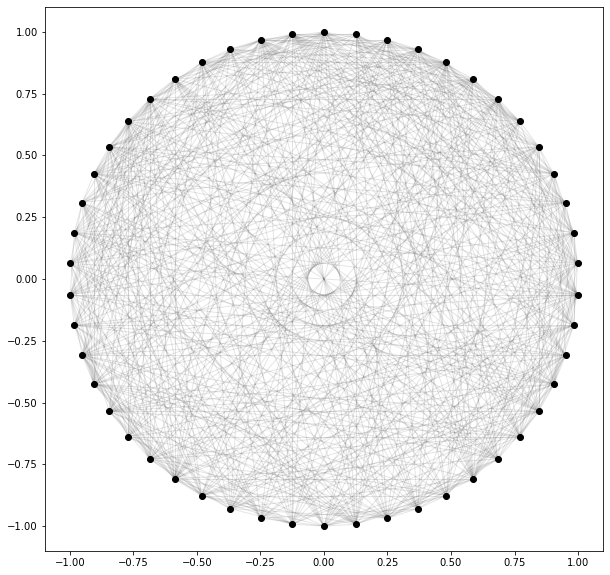

In [399]:
visualize(edges,alpha=.1)

In [400]:
degs = node_degree(edges)
print(degs)
max_color = np.max(degs)
print(max_color)

[29, 19, 25, 28, 30, 24, 24, 20, 24, 23, 18, 24, 24, 29, 23, 20, 28, 24, 24, 23, 24, 21, 20, 23, 23, 22, 21, 15, 22, 25, 29, 24, 17, 21, 28, 25, 18, 26, 20, 22, 23, 27, 23, 26, 30, 21, 23, 21, 31]
31


In [401]:
max_color

31

## Modelling

In [416]:
model = cp_model.CpModel()


# variables
max_color = 12
colors = [model.NewIntVar(0,int(max_color),f'c_{i}') for i in range(node_count)]
# colors = [model.NewIntVar(0,int(17),f'c_{i}') for i in range(node_count)]

# c_i =/= c_j
for n1,n2 in edges:
    model.Add(colors[n1]!=colors[n2])

In [418]:
model.Minimize(max(*colors))

In [419]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 30.0
status = solver.Solve(model)

In [420]:
res = [solver.Value(c) for c in colors]

print(*res)
print(max(*res)+1)
print([res.count(i) for i in np.unique(res)])

8 5 5 2 8 0 0 6 8 6 6 2 4 4 1 4 5 9 3 7 3 8 4 9 6 5 10 2 7 7 5 6 6 11 12 10 11 3 1 1 3 1 0 2 12 2 11 12 0 0
13
[5, 4, 5, 4, 4, 5, 6, 3, 4, 2, 2, 3, 3]


In [267]:
check_results(edges,res)

[All good!]


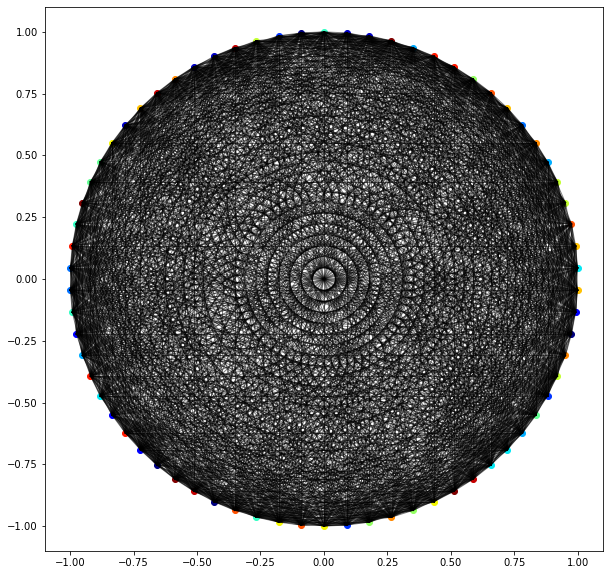

In [268]:
visualize(edges,colors=res)

In [284]:
cp_model.UNKNOWN, cp_model.FIXED_SEARCH,cp_model.FEASIBLE, cp_model.INFEASIBLE,cp_model.OPTIMAL

(0, 1, 2, 3, 4)

## Final Function

In [ ]:
def stepwise_opt(edges,node_count):
    print(f'*** Finding Solution for {node_count} Nodes',flush=True)
    n_colors,colors = color_graph(edges,node_count)
    print(f'Found solution for {n_colors} colors',flush=True)
    while n_colors is not None:
        print(f'\tTrying {n_colors-1} colors',flush=True)
        n_colors_prev, colors_prev = n_colors, colors
        max_color = n_colors-1
        n_colors,colors = color_graph(edges,node_count,max_color=max_color-1)
    return n_colors_prev, colors_prev

def color_graph(edges, node_count, max_color=None,max_time = None):
    if max_color is None:
        degs = node_degree(edges)
        max_color = np.max(degs)
        
    if max_time is None:
        max_time = max_time_calc(edges,node_count)
    # Create model
    model = cp_model.CpModel()
    
    # Define Variable
    colors = [model.NewIntVar(0,int(max_color),f'c_{i}') for i in range(node_count)]
    
    # Define Constraints
    for n1,n2 in edges:
        model.Add(colors[n1]!=colors[n2])
        
    # Define Objective
    model.Minimize(max(*colors))
    
    # Create Solver
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = max_time
    status = solver.Solve(model)
    
    if status == cp_model.FEASIBLE or status==cp_model.OPTIMAL:
        res = [solver.Value(c) for c in colors]
        n_colors = max(*res)+1
        return n_colors, res
    else:
        return None,[]

def max_time_calc(edges,node_count):
    pct = len(edges)/node_count**2
    t = node_count/1000*10 # using 10 sec for 1000 nodes as base
    t = t*pct/.05 # scale based on percentage of complete graph
    return max(10,t*2)

In [351]:
node_count, edge_count, edges = from_file(11)

File: gc_20_3
Nodes: 20
Edges: 63


In [353]:
color_graph(edges,node_count,max_time=120)

(6, [0, 3, 4, 1, 1, 0, 2, 2, 0, 3, 2, 5, 4, 4, 0, 3, 1, 0, 5, 0])

In [354]:
stepwise_opt(edges,node_count)

*** Finding Solution for 20 Nodes
Found solution for 6 colors
	Trying 5 colors
	Trying 4 colors


(5, [0, 3, 4, 1, 4, 0, 2, 3, 0, 2, 3, 1, 0, 3, 0, 2, 1, 0, 1, 0])